In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ucsd.csv")

In [3]:
df["Time of Crime"] = pd.to_datetime(df["Time of Crime"], format='%I:%M %p', errors='coerce').dt.strftime('%I:%M %p')

In [4]:
df["Date of Response"] = pd.to_datetime(df["Date of Response"])

In [5]:
df["Alert Category"].value_counts()

general_alerts = {
    "Timely Warning" : "Timely Warning",
    "Community Alert Bulletin" : "Alert Bulletin",
    "Confirmed Cases of COVID-19 at UC San Diego" : "COVID",
    "Crime Alert Bulletin" : "Alert Bulletin",
    "Annual Campus Lightning Review Walks" : "Reports",
    "Reissued 2021 UC San Diego Annual Security and Fire Safety Report" : "Reports",
    "Triton Alert Bulletin": "Alert Bulletin",
    "Annual Campus Lighting & Safety Review Walks" : "Reports",
    "Notice of the 2022 UC San Diego Annual Security and Fire Safety Report" : "Reports",
    "Information on Jacobs Medical Center Incident" : "Alert Bulletin"
}

In [6]:
df['Crime Category'] = df['Crime Category'].replace({
    'Theft by False Pretenses (Phone Scams)': 'Theft By False Pretenses (Phone Scams)', 
    'Theft by False Pretenses (Phone Scam)': 'Theft By False Pretenses (Phone Scams)',   
})

In [7]:
locs = df["Location of Crime"].value_counts()
locs = locs[~(locs.keys().isin(["Warren Lecture Hall", "Warren Mall", 'Thurgood Marshall College Residence Halls',
'Marshall Lower Apartments',  'Marshall Lower – Freedom building', 'Marshall Lower Apartments, "Empower" Building',
'Thurgood Marshall Apartments and Oceanview Terrace', "Sixth College", 'Seventh College', 
'Seventh College West residential area', "ERC", 'La Jolla Trolley Platform', 'Central Campus Trolley Station',
'UC Health Trolley Stop', 'Central Campus Trolley platform', 'Central Campus Trolley Station toward Library Walk',
'York Hall', '1000 York Lane', "Revelle College",'online, phone calls', 'Sun God Lawn', "Harlan Hall",
'Eleanor Roosevelt College residence halls', 'report of a fire at Argo Hall. The reporting party stated that there was a fire inside lounge room on the fourth floor.',
'Latin America Hall', 'Tioga Hall', 'Center Hall', "Library Walk near The Trove", "Pepper Canyon Apartments", 'South Mesa Apartments',
'3867 Miramar Street – Mesa Nueva Artesa', 'Mesa Nueva Housing', 'Mesa Verde Hall', 'Mesa Nueva', 'Mesa Apartments', 'near 9266 Regents Road (Mesa Apartments)',
'Mesa Housing Pedestrian Bike Bridge', 'Mesa Housing', 'Rita Atkinson Residences', "Cafe Ventanas", 'Applied Mathematics and Physics (AP&M) office',
'Keeling Apartments', 'The Rita Atkinson Residences', "Gilman Bridge", "Pangea Parking Structure", "Campus Point Parking Structure", 
'Jacobs Medical Center', "Matthews Apartment E building", 'a conference room inside of the North Torrey Pines Living and Learning – Mosaic building, 9605 Scholars Drive North',
'Sulpizio Cardiovascular Center at UC San Diego Health',     
]))]
# list(locs.keys())

In [8]:
list(locs.keys()[locs.keys().str.contains("Jacobs") == True])

[]

In [9]:
general_location = {
    "Warren Lecture Hall" : "Warren",
    "Warren Mall" : "Warren",
    "Harlan Hall" : "Warren",
    "Voigt Drive & Matthews Lane" : "Warren",
    
    'Thurgood Marshall College Residence Halls' : "Marshall",
    'Marshall Lower Apartments' : "Marshall",
    'Marshall Lower – Freedom building' : "Marshall",
    'Marshall Lower Apartments, "Empower" Building' : "Marshall",
    'Thurgood Marshall Apartments and Oceanview Terrace' : "Marshall",
    
    "Hopkins Parking Structure" : "Hopkins",
    "Voigt Drive and Hopkins Drive": "Hopkins",
    
    
    "the classrooms at the UC San Diego Extended Studies and Public Program Building, 9710 Scholars Drive North.": "Extended Studies",
    "intersection of Scholars Drive North and Exploration Drive": "Extended Studies",
    
    "Sixth College" : "Sixth",
    'a conference room inside of the North Torrey Pines Living and Learning – Mosaic building, 9605 Scholars Drive North' : "Sixth",
    "North Torrey Pines Living and Learning Center": "Sixth",
    "North Torrey Pines Living Learning Neighborhood": "Sixth",
    
    'Tioga Hall' : "Muir",
    'Applied Mathematics and Physics (AP&M) office' :"Muir", 
    
    'Seventh College' : "Seventh", 
    'Seventh College West residential area' : "Seventh",
    # near rimac field
    "area of parking lot #352": "Seventh",
    
    "ERC" : "ERC",
    'Eleanor Roosevelt College residence halls' : "ERC",
    'Latin America Hall' : "ERC",
    "Cafe Ventanas" : "ERC",
    "Pangea Parking Structure" : "ERC", 
    
    'Revelle College' : 'Revelle',
    'Keeling Apartments' : "Revelle",
    'York Hall' : "Revelle",
    '1000 York Lane' : "Revelle",
    "report of a fire at Argo Hall. The reporting party stated that there was a fire inside lounge room on the fourth floor." : "Revelle",
    "robbery that occurred at the 101 bus stop at the corner of North Torrey Pines and La Jolla Shores Drive": "Revelle",
    
    'La Jolla Playhouse' : 'Eighth',

    'La Jolla Trolley Platform' : "UC Health Trolley Station",
    'UC Health Trolley Stop' : "UC Health Trolley Station",
    'Central Campus Trolley Station' : "Central Campus Trolley Station",
    'Central Campus Trolley platform' : "Central Campus Trolley Station",
    'Central Campus Trolley Station toward Library Walk': "Central Campus Trolley Station",
    
    'online, phone calls' : "Online",
    
    'Sun God Lawn' : 'Sun God Lawn',
    
    'Pepper Canyon Apartments' : 'Pepper Canyon',
    "Matthews Apartment E building" : "Pepper Canyon",
    
    'Library Walk near The Trove' : 'Library Walk',
    'Center Hall' : "Library Walk",
    'Matthews Quad' : 'Library Walk',
    
    'South Mesa Apartments' : "Mesa Graduate Housing",
    '3867 Miramar Street – Mesa Nueva Artesa' : "Mesa Graduate Housing",
    'Mesa Nueva Housing' : "Mesa Graduate Housing",
    'Mesa Verde Hall': "Mesa Graduate Housing",
    'Mesa Nueva': "Mesa Graduate Housing",
    'Mesa Apartments': "Mesa Graduate Housing",
    'near 9266 Regents Road (Mesa Apartments)': "Mesa Graduate Housing",
    'Mesa Housing Pedestrian Bike Bridge': "Mesa Graduate Housing",
    'Mesa Housing': "Mesa Graduate Housing",
    "Nueva West Housing Street Corner Community Store": "Mesa Graduate Housing",
    "3857 Miramar Street, between Arena and Cresta buildings": "Mesa Graduate Housing",
    
    'Rita Atkinson Residences': "Rita Atkinson",
    'The Rita Atkinson Residences' : "Rita Atkinson", 
    # this is the street next to rita but idk if we should consider it rita
    "9000 Villa La Jolla Drive": "Rita Atkinson",
    
    "Gilman Bridge" : "Gilman Bridge", 
    
    "parking lot outside 3366 North Torrey Pines Court" : "Scripps",
    "Scripps Institution of Oceanography Old Director's House at 8670 Discovery Way, flames and smoke coming from the southeast corner of the building." : "Scripps",
    "Biological Grade Parking Lot #011" : "Scripps",
    
    "Campus Point Parking Structure": "UC San Diego Health System", 
    'Jacobs Medical Center' : "UC San Diego Health System",
    'Sulpizio Cardiovascular Center at UC San Diego Health' : "UC San Diego Health System",
    
    "Leichtag Biomedical Research Building": "UCSD School of Medicine",
    "School of Medicine - Holly Building": "UCSD School of Medicine",
    "the School of Medicine and Chancellor’s Complex" : "UCSD School of Medicine",
    "MTS Bus stop located at Villa La Jolla Drive and the entrance to the VA Hospital" : "UCSD School of Medicine",
    
    "UCSD Medical Center Hillcrest Parking Lot": "The Hillcrest Medical Center",
    "UC San Diego Medical - Hillcrest Arbor Parking Structure" : "The Hillcrest Medical Center",
    "UCSD Hillcrest Hospital": "The Hillcrest Medical Center",
    "UC San Diego Health Medical Offices South (4168 Front St.)": "The Hillcrest Medical Center",

    
    "the Triton Clubhouse at the baseball field at 3685 Voigt Drive" : "Trition Clubhouse",
    
    "residential spaces around campus" : "Around Campus",
    "various locations on the UC San Diego campus" : "Around Campus", 
}

In [10]:
df['map_group'] = df['Location of Crime'].apply(lambda x: general_location[x] if x in general_location.keys() else x)
df.head()

,Key,Alert Category,Date of Response,Time of Response,Date of Crime,Time of Crime,Crime Category,Location of Crime,Suspect Description,Suspect in Custody,Update,Link,map_group
0,1,Community Alert Bulletin,2019-03-18,NaN,NaN,NaN,Campus Threats,UC San Diego campus written on the inside surf...,No,No,NaN,https://adminrecords.ucsd.edu/Notices/2019/201...,UC San Diego campus written on the inside surf...
1,2,Community Alert Bulletin,2019-03-19,NaN,NaN,NaN,Campus Threats,UC San Diego campus written on the inside surf...,No,No,1.0,https://adminrecords.ucsd.edu/Notices/2019/201...,UC San Diego campus written on the inside surf...
2,3,Community Alert Bulletin,2019-03-20,NaN,NaN,NaN,Campus Threats,UC San Diego campus written on the inside surf...,No,No,1.0,https://adminrecords.ucsd.edu/Notices/2019/201...,UC San Diego campus written on the inside surf...
3,4,Community Alert Bulletin,2019-03-21,NaN,NaN,NaN,Campus Threats,UC San Diego campus written on the inside surf...,No,No,1.0,https://adminrecords.ucsd.edu/Notices/2019/201...,UC San Diego campus written on the inside surf...
4,5,Timely Warning,2019-05-21,7:40 AM,5/21/2019,07:28 AM,Weapons Law Violation,parking lot outside 3366 North Torrey Pines Court,Yes,No,NaN,https://adminrecords.ucsd.edu/Notices/2019/201...,Scripps


In [11]:
# this isn't a crime, just a notification that this road reopened
df[df['map_group'] == 'Voigt Drive']

,Key,Alert Category,Date of Response,Time of Response,Date of Crime,Time of Crime,Crime Category,Location of Crime,Suspect Description,Suspect in Custody,Update,Link,map_group
64,65,Community Alert Bulletin,2022-11-16,2:20 PM,NaN,NaN,Avoid Area,Voigt Drive,NaN,NaN,NaN,https://adminrecords.ucsd.edu/Notices/2022/202...,Voigt Drive


In [12]:
coords = {
    'Mesa Graduate Housing' : (32.87502265717985, -117.22292759641547), 
    'Revelle' : (32.874775437274074, -117.24184346833931), 
    'The Hillcrest Medical Center' :(32.75054274681195, -117.16247161061892),
    'ERC' : (32.8854805949752, -117.24241102499364),
    'Marshall' : (32.88322745763785, -117.242352818566),
    'UC San Diego Health System': (32.87802740143928, -117.2261369715337),
    'UCSD School of Medicine' : (32.874277832276334, -117.2354855752366), 
    'Sixth': (32.88039605707939, -117.24240926283937),
    'Seventh' : (32.88795824589793, -117.24223949298532), 
    'Library Walk' : (32.879165420702776, -117.23757909557858), 
    'Warren' : (32.881253575132405, -117.23466260598113), 
    'Central Campus Trolley Station' : (32.87830699468673, -117.23185272044901), 
    'Rita Atkinson' : (32.87274099845561, -117.23522676877275),
    'La Jolla Shores Hotel' : (32.85492840564671, -117.25820312016141),  
    'Trition Clubhouse' : (32.88145393232694, -117.22604461568349), 
    'Extended Studies' : (32.88143858274703, -117.24353269564939),
    'Pepper Canyon' : (32.87776786028423, -117.23137621544512), 
    'UC Health Trolley Station' : (32.881814209320716, -117.22354628116906), 
    'Scripps' : (32.868674622251646, -117.25195757194997), 
    'Muir' : (32.87897500681861, -117.242233264698),
    'Sun God Lawn' : (32.87845455039474, -117.23990366231277), 
    'Preuss School' : (32.8825774603386, -117.22217818159555), 
    'Gilman Bridge' : (32.87600005766554, -117.22885299138183),
    "Eighth" : (32.87208499560444, -117.24193833723639)

    
#     'Voigt Drive',
#     'while walking on 8600 La Jolla Scenic Drive North.',
#     'Around Campus',
#     'Online',
#     'UC San Diego campus written on the inside surfaces of three women’s restroom doors.',
}

In [13]:
df['coords'] = df['map_group'].apply(lambda x: coords[x] if x in coords.keys() else None)
df["latitude"] = df["coords"].str.get(0)
df["longitude"] = df["coords"].str.get(1)

In [14]:
import numpy as np
new_names = ['Key',
             'AlertCategory',
             'DateOfResponse',
             'TimeOfResponse',
             'DateOfCrime',
             'TimeOfCrime',
             'CrimeCategory',
             'LocationOfCrime',
             'SuspectDescription',
             'SuspectInCustody',
             'Update',
             'Link',
             'MapGroup',
             'coords',
             'latitude',
             'longitude',
             'quarter']

current = df.columns.tolist()

for i in np.arange(len(current)):
    df.rename(columns={current[i]: new_names[i]}, inplace=True)

In [15]:
months = {
    1: "WI",
    2: "WI",
    3: "WI",
    4: "SP",
    5: "SP",
    6: "SP",
    7: "SU",
    8: "SU",
    9: "SU",
    10: "FA",
    11: "FA",
    12: "FA",
}
df["quarter"] = df["DateOfResponse"].apply(lambda x: months[x.month] + str(x.year) if pd.notna(x) else np.NaN)
# df

In [16]:
df.to_csv('final_data.csv', index=False)

In [17]:
df["CrimeCategory"].value_counts()

CrimeCategory
Burglary                                                                                28
Robbery                                                                                  9
Arson                                                                                    8
Aggrevated Assault                                                                       8
Attempted Burglary                                                                       7
Sexual Battery                                                                           5
Avoid Area                                                                               5
Campus Threats                                                                           4
Suspicious Activity                                                                      4
Indecent Exposure                                                                        3
Theft By False Pretenses (Phone Scams)                                      

In [18]:
df[df["MapGroup"] == "Warren"]

,Key,AlertCategory,DateOfResponse,TimeOfResponse,DateOfCrime,TimeOfCrime,CrimeCategory,LocationOfCrime,SuspectDescription,SuspectInCustody,Update,Link,MapGroup,coords,latitude,longitude,quarter
39,40,Timely Warning,2022-02-17,5:58 PM,2/17/2022,NaN,Attempted E-Bike / Motor Vehicle Theft,Warren Lecture Hall,Yes,No,NaN,https://adminrecords.ucsd.edu/Notices/2022/202...,Warren,"(32.881253575132405, -117.23466260598113)",32.881254,-117.234663,WI2022
62,63,Community Alert Bulletin,2022-11-15,NaN,NaN,NaN,Avoid Area,Voigt Drive & Matthews Lane,NaN,NaN,NaN,https://adminrecords.ucsd.edu/Notices/2022/202...,Warren,"(32.881253575132405, -117.23466260598113)",32.881254,-117.234663,FA2022
63,64,Community Alert Bulletin,2022-11-16,NaN,NaN,NaN,Avoid Area,Voigt Drive & Matthews Lane,NaN,NaN,NaN,https://adminrecords.ucsd.edu/Notices/2022/202...,Warren,"(32.881253575132405, -117.23466260598113)",32.881254,-117.234663,FA2022
65,66,Community Alert Bulletin,2022-11-17,NaN,NaN,NaN,Avoid Area,Voigt Drive & Matthews Lane,NaN,NaN,NaN,https://adminrecords.ucsd.edu/Notices/2022/202...,Warren,"(32.881253575132405, -117.23466260598113)",32.881254,-117.234663,FA2022
101,102,Timely Warning,2023-10-28,12:02 AM,NaN,NaN,Burglary,Harlan Hall,No,No,NaN,https://adminrecords.ucsd.edu/Notices/2023/202...,Warren,"(32.881253575132405, -117.23466260598113)",32.881254,-117.234663,FA2023
112,113,Timely Warning,2024-01-11,8:34 AM,1/10/2024,11:30 PM,Burglary,Warren Mall,No,No,NaN,https://adminrecords.ucsd.edu/Notices/2024/202...,Warren,"(32.881253575132405, -117.23466260598113)",32.881254,-117.234663,WI2024


In [19]:
import matplotlib.pyplot as plt

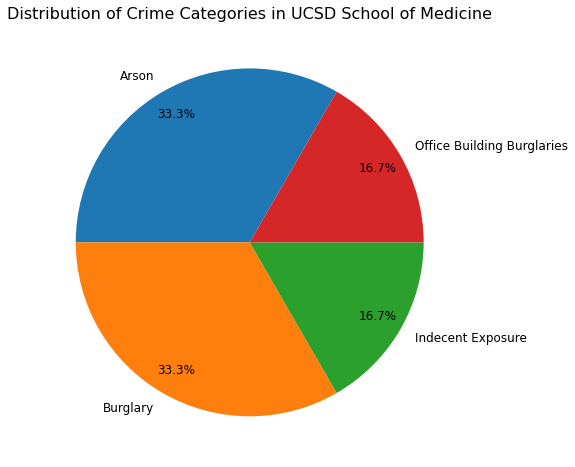

In [33]:
df_filtered = df[df["MapGroup"] == "UCSD School of Medicine"]

# Count the occurrences of each crime category in the filtered DataFrame
crime_category_counts_filtered = df_filtered['CrimeCategory'].value_counts()

# Plotting the pie chart with adjusted label distance
plt.figure(figsize=(10, 8))
pie = crime_category_counts_filtered.plot.pie(autopct='%1.1f%%', startangle=60, pctdistance=0.85)
plt.title('Distribution of Crime Categories in UCSD School of Medicine', fontsize=16)
plt.ylabel('')  # To remove the default 'CrimeCategory' label on the y-axis

# Increase the font size of labels
for text in pie.texts:
    text.set_fontsize(12)

# Save the pie chart as an image file (e.g., JPEG)
plt.savefig('med.jpeg', bbox_inches='tight')

# Show the plot
plt.show()